<a href="https://colab.research.google.com/github/Shivang-Quantum/QuantaPytha/blob/Tutort/Deep%20Learning/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import ttest_1samp
from numpy.random import normal
from numpy.random import randn
from numpy.random import seed

In [ ]:
from re import S
print(dir(sp))
#print(dir(ttest_1samp))

['LowLevelCallable', '__numpy_version__', '__version__', 'cluster', 'datasets', 'fft', 'fftpack', 'integrate', 'interpolate', 'io', 'linalg', 'misc', 'ndimage', 'odr', 'optimize', 'show_config', 'signal', 'sparse', 'spatial', 'special', 'stats', 'test']


In [ ]:
seed=100
sample=normal(150,10,20)
print(sample)

[142.18088317 145.62491017 150.95425087 159.21450069 150.60750196
 152.11124755 150.16527567 151.7718772  138.83529982 150.80927101
 148.13421006 149.43175519 154.92336556 143.19321859 149.15491973
 147.02638117 154.17302005 157.84770651 140.44574738 155.85910431]


In [ ]:
t_value, p_value = stats.ttest_1samp(sample,popmean=150)

print(f"The t Value is {t_value} and P Value is {p_value}")

The t Value is 0.17709096274004366 and P Value is 0.8613111192663625


['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__signature__', '__sizeof__', '__str__', '__subclasshook__', '__wrapped__']


In [6]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
os.listdir('/content/Data/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [9]:
os.listdir('/content/Data/cats_and_dogs_filtered/train/dogs')[:10]

['dog.403.jpg',
 'dog.939.jpg',
 'dog.17.jpg',
 'dog.804.jpg',
 'dog.837.jpg',
 'dog.49.jpg',
 'dog.630.jpg',
 'dog.715.jpg',
 'dog.564.jpg',
 'dog.775.jpg']

In [12]:
base_dir = '/content/Data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

In [13]:
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

In [14]:
val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

In [16]:
print(len(os.listdir(train_cat_dir)))
print(len(os.listdir(train_dog_dir)))

1000
1000


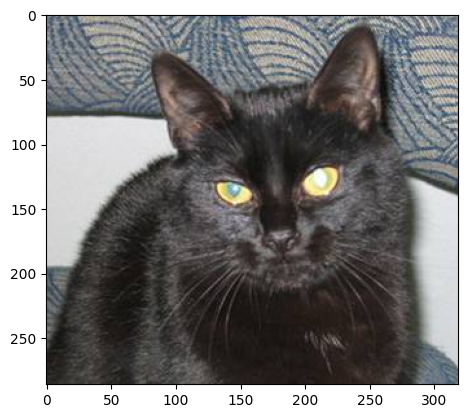

In [18]:
# Accessing and Viewing Image
cat_image_path = os.path.join(train_cat_dir, os.listdir(train_cat_dir)[0])
cat_image = mpimg.imread(cat_image_path)
plt.imshow(cat_image)

In [20]:
cat_image.shape

(286, 319, 3)

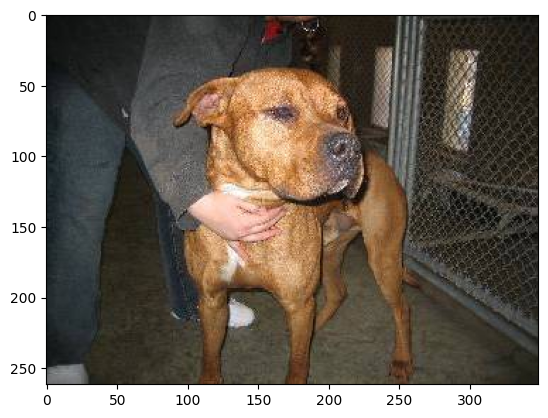

In [21]:
dog_image = mpimg.imread(os.path.join(train_dog_dir, os.listdir(train_dog_dir)[0]))
plt.imshow(dog_image)

In [23]:

def create_paths(n = 20, dir = train_dir):
  cats_dir = os.path.join(dir, 'cats')
  dogs_dir = os.path.join(dir, 'dogs')
  cat_images = os.listdir(cats_dir)[:n]
  dog_images = os.listdir(dogs_dir)[:n]

  cat_image_paths = [os.path.join(cats_dir, image) for image in cat_images]
  dog_image_paths = [os.path.join(dogs_dir, image) for image in dog_images]

  image_paths = cat_image_paths + dog_image_paths
  return image_paths

create_paths(n = 30, dir = val_dir)

['/content/Data/cats_and_dogs_filtered/validation/cats/cat.2406.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2217.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2439.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2346.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2168.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2148.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2301.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2098.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2222.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2101.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2340.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2312.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2473.jpg',
 '/content/Data/cats_and_dogs_filtered/validation/cats/cat.2030.jpg',
 '/content/Data/cats

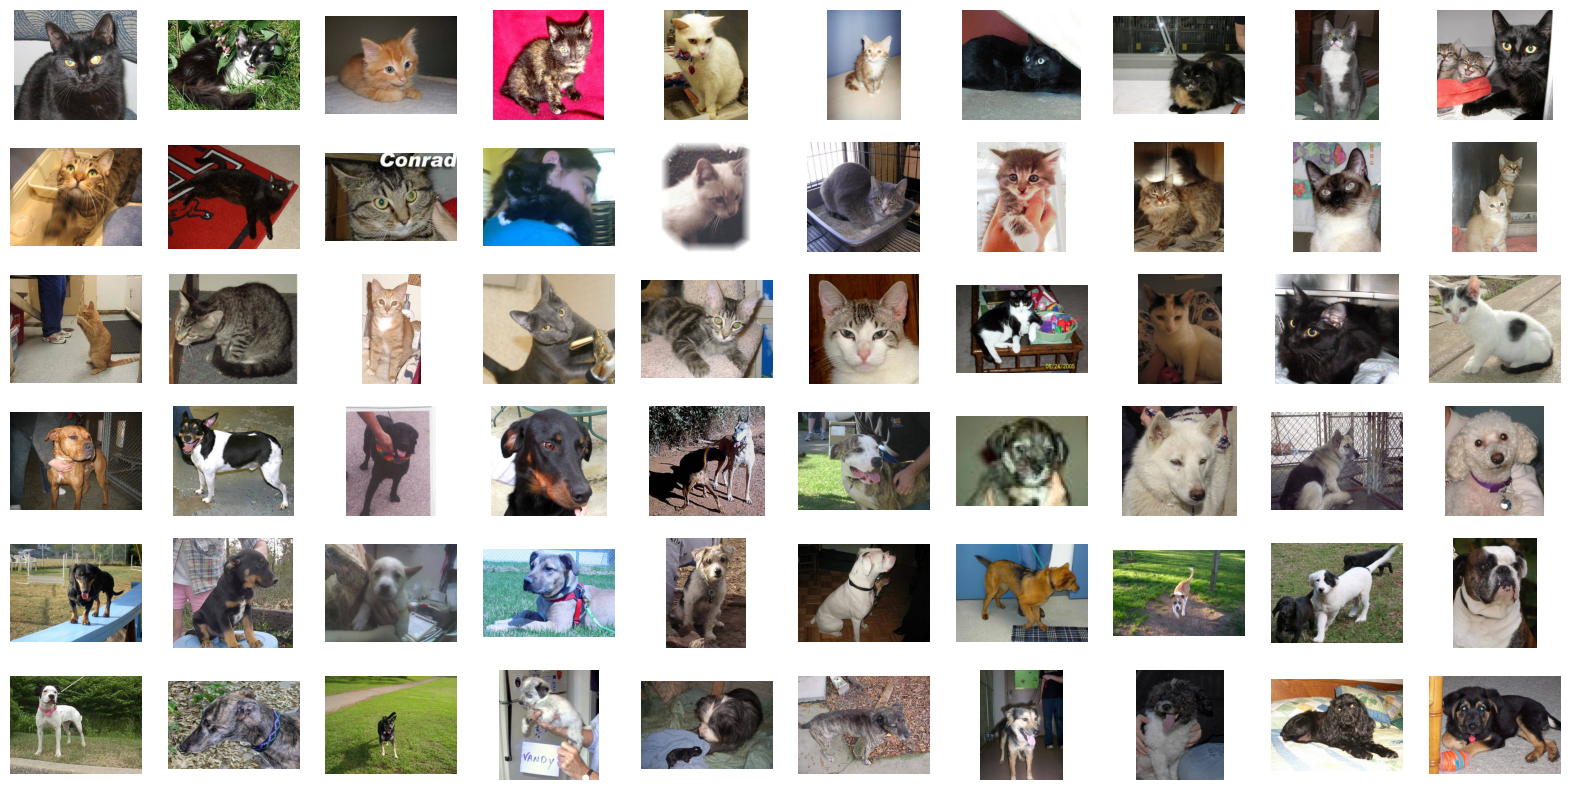

In [24]:
image_paths = create_paths(30)

plt.figure(figsize = (20,10))
for i in range(60):
  plt.subplot(6, 10, i+1)
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)
  plt.axis('off')


In [25]:
train_datagen = ImageDataGenerator(
    rescale = 1/225,
    rotation_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    )

In [26]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 50,
    target_size = (150,150),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [27]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 50,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [28]:
model = tf.keras.models.Sequential()

model.add(Flatten(input_shape = (150,150,3)))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(516, activation = 'relu'))
model.add(Dense(214, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 1024)              69121024  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 516)               528900    
                                                                 
 dense_3 (Dense)             (None, 214)               110638    
                                                                 
 dense_4 (Dense)             (None, 1)                 215       
                                                                 
Total params: 70810377 (270.12 MB)
Trainable params: 708

In [30]:
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 50,
    verbose = 1
)

Epoch 1/50
40/40 [==============================] - 17s 350ms/step - loss: 0.7080 - accuracy: 0.5040 - val_loss: 0.6918 - val_accuracy: 0.5070
Epoch 2/50
40/40 [==============================] - 14s 356ms/step - loss: 0.6968 - accuracy: 0.5190 - val_loss: 0.6866 - val_accuracy: 0.5570
Epoch 3/50
40/40 [==============================] - 14s 358ms/step - loss: 0.6868 - accuracy: 0.5345 - val_loss: 0.6906 - val_accuracy: 0.5320
Epoch 4/50
40/40 [==============================] - 14s 359ms/step - loss: 0.6904 - accuracy: 0.5355 - val_loss: 0.6826 - val_accuracy: 0.5390
Epoch 5/50
40/40 [==============================] - 14s 358ms/step - loss: 0.6859 - accuracy: 0.5455 - val_loss: 0.6844 - val_accuracy: 0.5380
Epoch 6/50
40/40 [==============================] - 15s 368ms/step - loss: 0.6827 - accuracy: 0.5535 - val_loss: 0.6730 - val_accuracy: 0.5850
Epoch 7/50
40/40 [==============================] - 15s 380ms/step - loss: 0.6882 - accuracy: 0.5525 - val_loss: 0.6733 - val_accuracy: 0.5780